In [1]:
import geopandas as gpd
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import scale
from clustergram import Clustergram
import matplotlib.pyplot as plt

In [2]:
percentiles_joined = gpd.read_parquet("./out/singapore/tessellation_percentiles.pq")
tessellation = gpd.read_parquet("./out/singapore/tessellation_stats.pq")
buildings = gpd.read_parquet("./out/singapore/buildings.pq")

In [15]:
tessellation.head()

uID                                           geometry  convexity  \
0  75707.0  POLYGON ((45510.911 33224.180, 45517.076 33236...   0.957765   
1  74906.0  MULTIPOLYGON (((43852.067 36248.967, 43784.590...   0.840004   
2  74909.0  MULTIPOLYGON (((43767.188 36235.006, 43757.647...   0.982273   
3  74915.0  MULTIPOLYGON (((43800.984 36416.304, 43801.539...   0.941257   
4  74921.0  POLYGON ((43453.691 36562.605, 43453.334 36563...   0.921910   

          area_x  neighbours  neighbours400  covered_area     mean_area  \
0   22937.497181          22              3  3.304277e+05  97631.601565   
1  235621.185654          40              0  1.056545e+06  65194.838533   
2   54389.426355          38              2  5.063879e+05  50002.502721   
3   77570.608968          46              4  7.223144e+05  43228.015279   
4   14120.738619          35              9  1.243544e+05  43769.543130   

   mean_area_iq       area_rng  ...  str_align  cell_align  \
0  56803.633839  427280.928675  ...   0.233152    0.141047   
1  35980.716008  447656.891680  ...   5.294152    6.564115   
2  31821.096351  234705.882192  ...  14.614829    8.064704   
3  24545.857306  234705.882192  ...  19.348732    8.783638   
4  25385.820713  234705.882192  ...   9.579286    2.591594   

   betweeness_centrality_left  node_degree  closeness  \
0                    0.000140          2.0   0.000000   
1                    0.002376          3.0   1.000000   
2                    0.002633          2.0   0.000000   
3                    0.000168          2.0   0.068419   
4                    0.000140          2.0   0.076781   

   global_closeness_centrality  global_clustering_400m  eigenvector  \
0                     0.000043                0.166667      62344.0   
1                     0.000048                     NaN      52676.0   
2                     0.000050                0.000000      42869.0   
3                     0.000049                0.000000      25573.0   
4                     0.000049                0.000000      25575.0   

   node_centrality_400m  betweeness_centrality_right  
0                  20.0                     0.000140  
1                   1.0                     0.002402  
2                   7.0                     0.002633  
3                  16.0                     0.000196  
4                  15.0                     0.000168  

[5 rows x 35 columns]

In [3]:
percentiled_dropped = percentiles_joined.drop(["uID", "geometry"], axis = 1)

In [4]:
standardized = (percentiled_dropped - percentiled_dropped.mean()) / percentiled_dropped.std()
standardized.fillna(0, inplace=True)
standardized.head()

convexity_25  convexity_50  convexity_75  area_x_25  area_x_50  area_x_75  \
0     -1.290818      0.232533      0.092995   2.443342   3.028067   4.028111   
1     -0.791311     -0.591813     -0.295556   1.498087   2.441563   2.094302   
2     -1.147271     -0.491037     -0.269117   0.868977   2.145752   1.917969   
3     -0.316356     -0.375749     -0.246288   0.634845   1.565940   1.665821   
4     -0.579881     -0.397346     -0.272726   0.593102   1.629403   1.803199   

   neighbours_25  neighbours_50  neighbours_75  neighbours400_25  ...  \
0      -1.083095      -1.043028      -1.103813         -1.060831  ...   
1      -0.085882       0.211920       0.261412         -1.060831  ...   
2       0.412724       0.421078       0.346738         -1.060831  ...   
3       0.537375       0.630236       0.688045         -1.035503  ...   
4       0.724353       0.630236       0.688045         -1.048167  ...   

   global_clustering_400m_75  eigenvector_25  eigenvector_50  eigenvector_75  \
0                   1.449506        2.399162        1.748317        1.088207   
1                   0.107103       -0.018961       -0.503096        0.387329   
2                   1.468027       -0.018896       -0.503096       -0.161608   
3                   0.107103       -0.018896       -0.503156       -0.161608   
4                   1.545818       -0.018698       -0.504542       -0.438959   

   node_centrality_400m_25  node_centrality_400m_50  node_centrality_400m_75  \
0                -1.564426                -1.230041                -1.283928   
1                -1.181615                -0.961646                -0.952306   
2                -1.124193                -0.894548                -0.982453   
3                -1.162474                -0.894548                -1.012601   
4                -1.181615                -1.196491                -1.042748   

   betweeness_centrality_right_25  betweeness_centrality_right_50  \
0                       -0.188942                       -0.266220   
1                       -0.188942                       -0.218522   
2                       -0.180227                       -0.218522   
3                       -0.180227                       -0.199447   
4                       -0.180227                       -0.218522   

   betweeness_centrality_right_75  
0                       -0.393699  
1                       -0.337602  
2                       -0.359614  
3                       -0.337602  
4                       -0.359614  

[5 rows x 99 columns]

In [5]:
sns.set(style='whitegrid')

K=1 skipped. Mean computed from data directly.


/home/virgilxw/miniconda3/envs/rapids-23.04/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=2 fitted in 2.630662441253662 seconds.


/home/virgilxw/miniconda3/envs/rapids-23.04/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=3 fitted in 2.6807878017425537 seconds.


/home/virgilxw/miniconda3/envs/rapids-23.04/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=4 fitted in 3.1716883182525635 seconds.


/home/virgilxw/miniconda3/envs/rapids-23.04/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=5 fitted in 4.601349353790283 seconds.


/home/virgilxw/miniconda3/envs/rapids-23.04/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=6 fitted in 4.8104705810546875 seconds.


/home/virgilxw/miniconda3/envs/rapids-23.04/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=7 fitted in 6.123004198074341 seconds.


/home/virgilxw/miniconda3/envs/rapids-23.04/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=8 fitted in 4.781067609786987 seconds.


/home/virgilxw/miniconda3/envs/rapids-23.04/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=9 fitted in 4.669132471084595 seconds.


/home/virgilxw/miniconda3/envs/rapids-23.04/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=10 fitted in 5.805809259414673 seconds.


<Axes: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

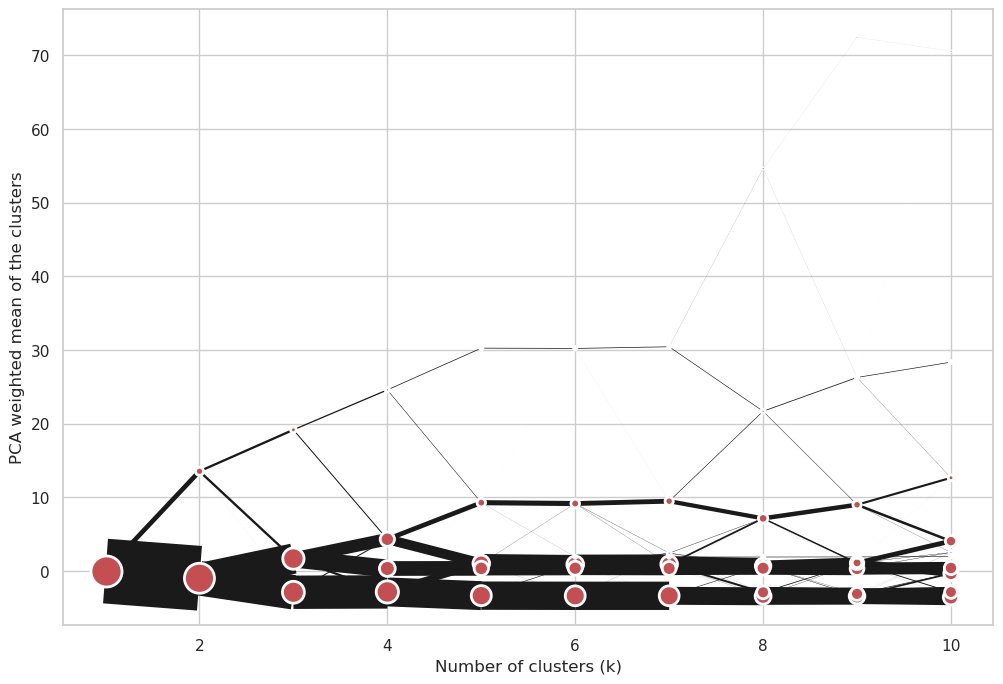

In [6]:
cgram = Clustergram(range(1, 11), method='hierarchical', linkage='ward')
cgram.fit(standardized)
cgram.plot(figsize=(12, 8), pca_weighted=True)

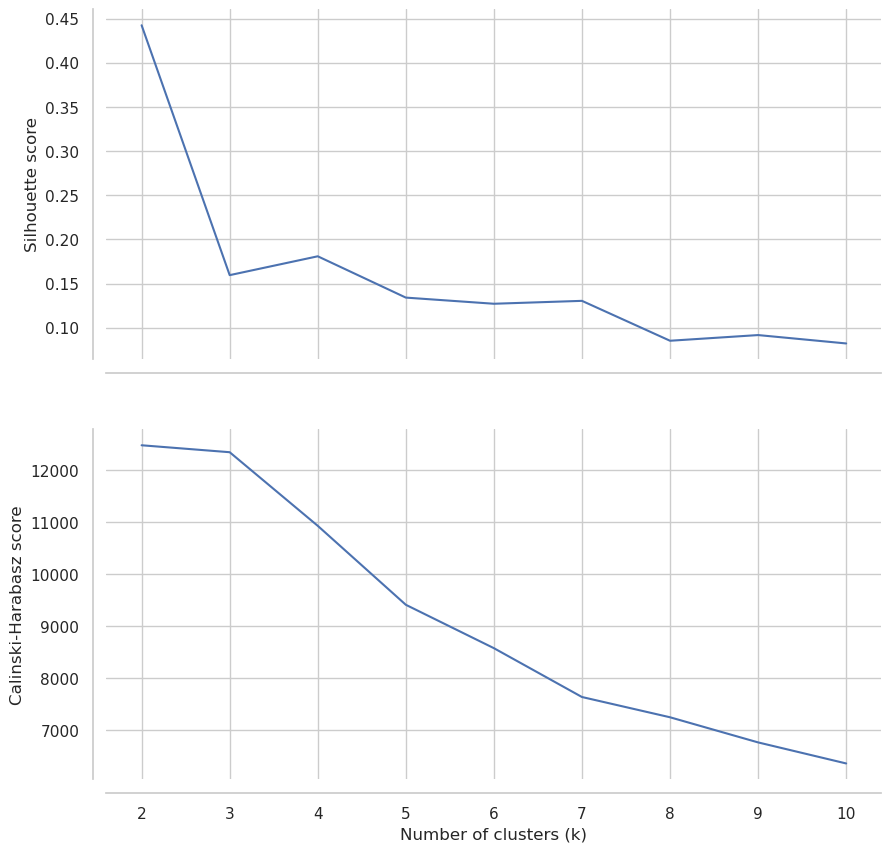

In [7]:
fig, axs = plt.subplots(2, figsize=(10, 10), sharex=True)
cgram.silhouette_score().plot(xlabel="Number of clusters (k)", ylabel="Silhouette score", ax=axs[0])
cgram.calinski_harabasz_score().plot(xlabel="Number of clusters (k)", ylabel="Calinski-Harabasz score", ax=axs[1])
sns.despine(offset=10)

In [8]:
cgram.labels.head()

1   2   3   4   5   6   7   8   9   10
0   0   1   2   0   1   0   5   6   2   4
1   0   1   2   1   3   5   3   5   4   5
2   0   1   2   1   3   5   3   5   4   5
3   0   1   1   1   3   5   3   5   4   5
4   0   1   1   1   3   5   3   5   4   5

In [9]:
percentiles_joined["cluster"] = cgram.labels[5].values

In [10]:
buildings = buildings.merge(percentiles_joined[["uID", "cluster"]], on="uID", how="left")

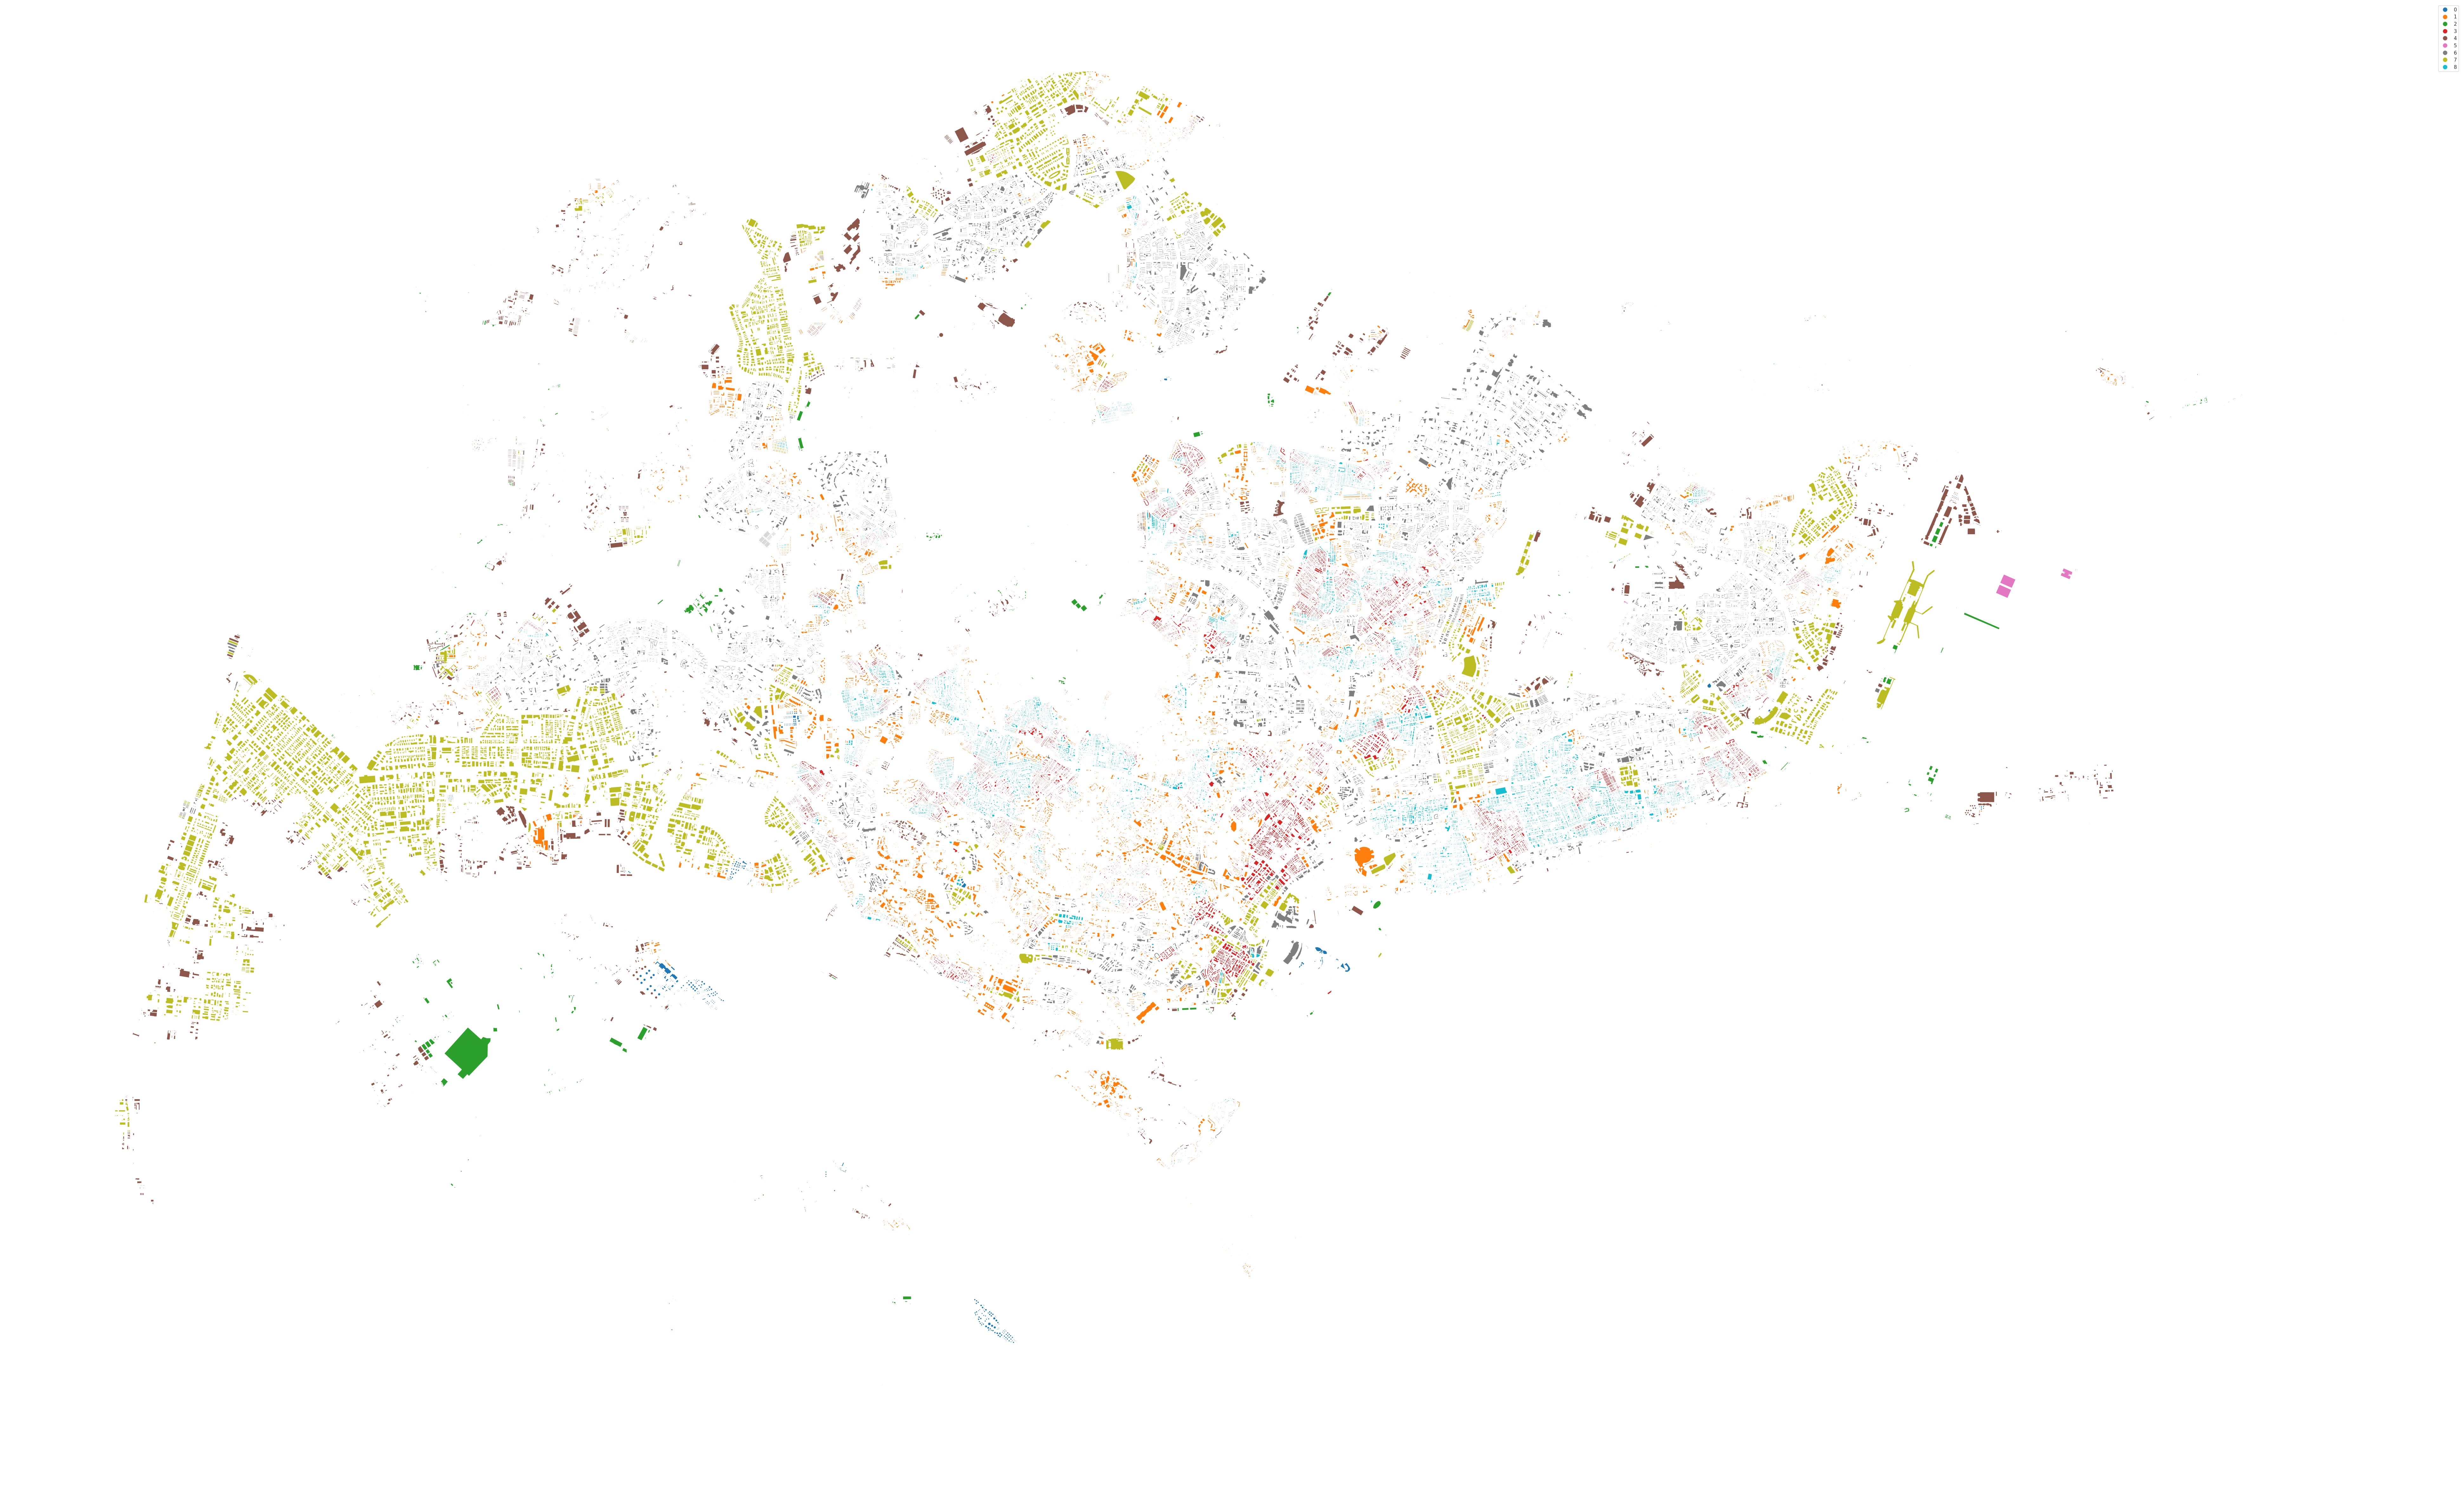

In [11]:
urban_types = buildings[["geometry", "uID"]].merge(percentiles_joined[["uID", "cluster"]], on="uID")
urban_types.plot("cluster", categorical=True, figsize=(100, 100), legend=True).set_axis_off()

In [12]:
buildings.head()

geometry  uID  cluster
0  POLYGON ((4098.105 23706.883, 4109.145 23706.8...    0      4.0
1  POLYGON ((4169.087 23688.953, 4169.269 23731.3...    1      4.0
2  POLYGON ((4129.786 23795.994, 4196.953 23795.9...    2      4.0
3  POLYGON ((3940.171 23898.114, 3939.741 23952.6...    3      4.0
4  POLYGON ((3908.968 23952.996, 3934.866 23953.1...    4      4.0

In [13]:
buildings.to_parquet("./out/singapore/buildings.pq")